### Paper Giacomo und Lotti 

### Lexisnexis articles sourced via API on South African coal articles

#### March 2024

#### We source the original file from Tim Repke (https://mycloud.mcc-berlin.net/index.php/s/f5dsSxHLElehmNK) and convert it from tar to jsonl. Load the .json file and extract the article text from the "Document" column, which itself includes html code. We also extract data on the "country", "state" and "city" of the article. The goal is to produce a csv file for further use in R.

In [1]:
import pandas as pd
import re
from bs4 import BeautifulSoup

In [5]:
# Specifying the file path
#file_path = 'C:/Users/charlott/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/coal_southafrica.jsonl'
file_path = 'C:/Users/giacomoraederscheidt/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/coal_southafrica.jsonl'

df = pd.read_json(file_path, lines=True)

# Extracting the article text from the "Content" part of the "Document" column which includes the actual article texts 
def extract_article_text(row):
    try:
        # Converting to string, in case the row is not already a string
        row_str = str(row)

        # Extracting the json-like string within the cell
        match = re.search(r"'Content':\s*'(.+?)'}", row_str)
        if match:
            # Extracting the html content within "Content"
            html_content = match.group(1)

            # Parsing the html content with the BeautifulSoup package
            soup = BeautifulSoup(html_content, 'html.parser')

            # Extracting text from the paragraphs within the <bodyText> tags
            body_text = soup.find_all('p')
            return ' '.join(p.get_text(strip=True) for p in body_text)
        else:
            return ''  # Returning empty string if no match found
    except Exception as e:
        print("Error processing row:", e)
        return ''  # Returning empty string in case of error

# Applying the function to the "Document" column
df['Article_Text'] = df['Document'].apply(extract_article_text)

# Displaying the dataframe with the article text
print(df[['Article_Text']].head())

#Extracting the classifications from the "Document" column
def extract_classifications(html_content, classification_scheme):
    soup = BeautifulSoup(html_content, 'html.parser')
    # Find all 'classification' tags and then filter for the desired scheme in Python
    classifications = soup.find_all('classification')
    class_names = []

    for classification in classifications:
        # Check if the classificationScheme matches the desired scheme
        if classification.get('classificationscheme', '').lower() == classification_scheme:
            class_items = classification.find_all('classificationitem')
            for item in class_items:
                class_name = item.find('classname')
                if class_name and class_name.text:
                    class_names.append(class_name.text)

    return '; '.join(class_names) if class_names else pd.NA

def extract_data_from_document(row, scheme):
    try:
        # Checking if row is a dictionary and has 'Content' key
        if isinstance(row, dict) and 'Content' in row:
            content = row['Content']  # Directly use the 'Content' from the dict
            return extract_classifications(content, scheme)
        else:
            return pd.NA
    except Exception as e:
        print(f"Error processing row: {e}")
        return pd.NA  # Use pd.NA for missing values

# Creating a new column for each classification scheme and populating it
for scheme in ['language', 'city', 'state', 'country']:
    df[scheme.capitalize()] = df['Document'].apply(extract_data_from_document, scheme=scheme.lower())

ValueError: Expected object or value

In [4]:
# Splitting the 'Overview' column
df[['News Outlet', 'Word Count']] = df['Overview'].str.split(', ', expand=True)
df = df.drop('Overview', axis=1)

NameError: name 'df' is not defined

In [4]:
# Displaying the DataFrame to verify the new columns
print(df.head())


# Saving the dataframe to .csv
df.to_csv('C:/Users/charlott/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv')

NameError: name 'df' is not defined

#### 8 March 2024

#### RA Nibwene has prepared a file with the 30 news outlets. We will reduce our Lexisnexis dataset to those outlets. They represent the most read/circulated news outlets in South Africa (see Excel document "Newspapers SA").

In [5]:
file_path = r'C:\Users\charlott\Dropbox (Personal)\Paper_Giacomo_Lotti\A Articles Cleaning\Newspaper outlets SA.xlsx'
list_outlets = pd.read_excel(file_path)
list_outlets = list_outlets.rename(columns={'Overview': 'News Outlet'})
print(list_outlets)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\charlott\\Dropbox (Personal)\\Paper_Giacomo_Lotti\\A Articles Cleaning\\Newspaper outlets SA.xlsx'

### Do the filtering in order to keep only the 30 most important news outlets
#### Start by loading the full dataset and create the "news outlet" variable

In [21]:
# Load the data
#file_path = 'C:/Users/charlott/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv'
file_path = 'C:/Users/charlott/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
print(df.head())

# Splitting the 'Overview' column
split_columns = df['Overview'].str.split(', ', n=1, expand=True)  # Split only into two columns
split_columns.columns = ['News Outlet', 'Word Count']  # Rename the columns
print("Number of columns after split:", len(split_columns.columns))  # Debugging: Check the number of columns after split
print(split_columns.head())  # Debugging: Print the first few rows to inspect the split result

# Merge the split columns with the original DataFrame
df = pd.concat([df, split_columns], axis=1)

# Drop the original 'Overview' column
df = df.drop('Overview', axis=1)

print(df.head())  # Display the DataFrame after splitting and renaming columns

C:\Users\charlott\AppData\Local\Temp\ipykernel_26844\1217981675.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


   Unnamed: 0                 Jurisdiction  Location ContentType Byline  \
0           0                International       NaN        News    NaN   
1           1  U.S. Federal; International       NaN        News    NaN   
2           2                International       NaN        News    NaN   
3           3  U.S. Federal; International       NaN        News    NaN   
4           4  U.S. Federal; International       NaN        News    NaN   

   WordLength WebNewsUrl  Geography  NegativeNews Language  ...  \
0         279        NaN        NaN           NaN  ENGLISH  ...   
1        5990        NaN        NaN           NaN  ENGLISH  ...   
2         330        NaN        NaN           NaN  ENGLISH  ...   
3         473        NaN        NaN           NaN  ENGLISH  ...   
4         571        NaN        NaN           NaN  ENGLISH  ...   

   DocumentContent_odata_mediaContentType  \
0                    application/atom+xml   
1                    application/atom+xml   
2          

In [22]:
# Print the unique entries in the 'News Outlet' column
unique_outlets = df['News Outlet'].unique()
print("Unique News Outlets:", unique_outlets)

# Print the number of unique entries
num_unique_outlets = len(unique_outlets)
print("Number of Unique News Outlets:", num_unique_outlets)

# Set every entry in the 'News Outlet' column to missing if the length of the entry exceeds 9 words

import numpy as np

# Define a function to check the length of each entry and replace if necessary
def replace_long_entries(entry):
    if pd.notnull(entry) and len(entry.split()) > 9:
        return 'missing'
    else:
        return entry

# Apply the function to the 'News Outlet' column
df['News Outlet'] = df['News Outlet'].apply(replace_long_entries)

# Print the unique entries after replacing
unique_outlets = df['News Outlet'].unique()
print("Unique News Outlets after replacement:", unique_outlets)

# Print the number of unique entries after replacement
num_unique_outlets = len(unique_outlets)
print("Number of Unique News Outlets after replacement:", num_unique_outlets)


Unique News Outlets: ['South Africa Mining Report' 'EIU ViewsWire'
 'Carbon & Climate Law Review' ...
 'This year marks the 20th anniversary of the implementation of the Mineral and Petroleum Resources Development Act'
 'As South Africa gears up for its national and provincial elections'
 'JOHANNESBURG - Coal exports to...']
Number of Unique News Outlets: 4544
Unique News Outlets after replacement: ['South Africa Mining Report' 'EIU ViewsWire'
 'Carbon & Climate Law Review' ... 'Stirling Community Press'
 'Environmental' 'JOHANNESBURG - Coal exports to...']
Number of Unique News Outlets after replacement: 3924


### Now merge the outlet list with the full dataset

In [27]:
# Merge the two DataFrames based on the 'News Outlet' column
filtered_df = pd.merge(df, list_outlets, on='News Outlet', how='inner')

# Display the unique entries of 'News Outlet' column in the merged DataFrame
print(filtered_df['News Outlet'].unique())

print("Number of Unique News Outlets after merge:", len(filtered_df['News Outlet'].unique()))

['The Sunday Independent (South Africa)' 'Sunday Times (South Africa)'
 'Cape Times (South Africa)' 'Business Day (South Africa)' 'Africa News'
 'Daily News (South Africa)' 'The Star (South Africa)'
 'Financial Mail (South Africa)' 'WeekendPost (South Africa)'
 'Sowetan (South Africa)' 'The Herald (South Africa)'
 'The Mercury (South Africa)' 'Mail & Guardian'
 'Daily Dispatch (South Africa)' 'Pretoria News (South Africa)'
 'Cape Argus (South Africa)' 'Cape Argus (Cape Town)'
 'The Independent on Saturday (South Africa)'
 'Sunday Tribune (South Africa)' 'Pretoria News Weekend (South Africa)'
 'Sunday World (South Africa)' 'Post (South Africa)' 'Daily Maverick'
 'Pretoria News (South Africa)/Pretoria News Weekend (South Africa)'
 'Cape Argus (South Africa)/Argus Weekend (South Africa)' 'Sunday World'
 'Africanews (English)' 'Daily Sun' 'Cape Business News']
Number of Unique News Outlets after merge: 29


### Some checks

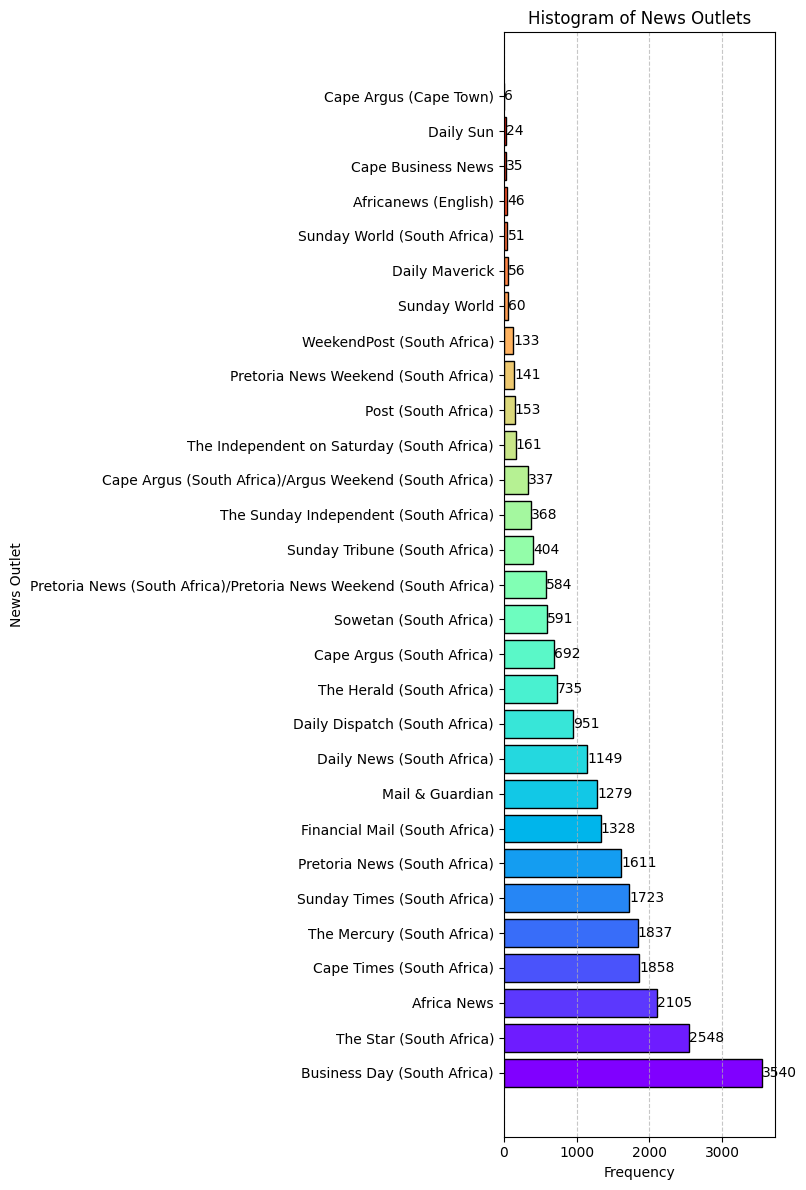

In [28]:
# Get the unique values of the 'News Outlet' column
unique_outlets = filtered_df['News Outlet'].unique()

# Count the frequency of each outlet
outlet_counts = filtered_df['News Outlet'].value_counts()

# Plot histogram with outlets on the y-axis
plt.figure(figsize=(8, 12))  # Adjust figure size as needed

# Define colors using a colormap
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_outlets)))

# Plot horizontal bars with rainbow colors
plt.barh(outlet_counts.index, outlet_counts.values, color=colors, edgecolor='black')
plt.xlabel('Frequency')
plt.ylabel('News Outlet')
plt.title('Histogram of News Outlets')

# Annotate each bar with the number of articles
for i, count in enumerate(outlet_counts.values):
    plt.text(count, i, str(count), ha='left', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better visualization
plt.tight_layout()
plt.show()

In [37]:
print(len(filtered_df))

# Filter out rows where "News Outlet" is not labeled as "missing"
valid_outlets = filtered_df[filtered_df['News Outlet'] != 'missing']

24506


In [38]:
# Initialize a variable to store the sum of articles
total_articles = 0

# Iterate through unique "News Outlet" values
for outlet in valid_outlets['News Outlet'].unique():
    # Calculate the number of articles for the current outlet
    num_articles = len(valid_outlets[valid_outlets['News Outlet'] == outlet])
    print(f"Number of articles for {outlet}: {num_articles}")
    # Add the number of articles for the current outlet to the total sum
    total_articles += num_articles

print("Total number of articles:", total_articles)


Number of articles for The Sunday Independent (South Africa): 368
Number of articles for Sunday Times (South Africa): 1723
Number of articles for Cape Times (South Africa): 1858
Number of articles for Business Day (South Africa): 3540
Number of articles for Africa News: 2105
Number of articles for Daily News (South Africa): 1149
Number of articles for The Star (South Africa): 2548
Number of articles for Financial Mail (South Africa): 1328
Number of articles for WeekendPost (South Africa): 133
Number of articles for Sowetan (South Africa): 591
Number of articles for The Herald (South Africa): 735
Number of articles for The Mercury (South Africa): 1837
Number of articles for Mail & Guardian: 1279
Number of articles for Daily Dispatch (South Africa): 951
Number of articles for Pretoria News (South Africa): 1611
Number of articles for Cape Argus (South Africa): 692
Number of articles for Cape Argus (Cape Town): 6
Number of articles for The Independent on Saturday (South Africa): 161
Number

### Save this as a csv datafile such that Giacomo can use it for further data cleaning

In [39]:
# Saving the dataframe to .csv
filtered_df.to_csv('C:/Users/charlott/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation_Filtered.csv')

# Data cleaning

test test


In [7]:
# Load the data
#file_path = 'C:/Users/charlott/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv'
file_path = 'C:/Users/giacomoraederscheidt/Dropbox/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv'


df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/giacomoraederscheidt/Dropbox (Personal)/Paper_Giacomo_Lotti/0 Data/Coal_API_Data_Preparation.csv'